In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Провести навчання і класифікацію даних. Виконати наступні процедури:

1) Завантажити дані, вивести на екран назви колонок і розмір датасета

In [3]:
data = pd.read_csv('../input/water-quality/waterQuality1.csv')

data = data.drop('ammonia', axis = 1)
data = data.drop('flouride', axis = 1)
data = data.drop('selenium', axis = 1)
data = data.drop('uranium', axis = 1)

data = data[data['is_safe'] != '#NUM!']
data['is_safe'] = data['is_safe'].astype(int)

data.head(6)

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,silver,is_safe
0,1.65,0.04,2.85,0.007,0.35,0.83,0.17,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.34,1
1,2.32,0.01,3.31,0.002,5.28,0.68,0.66,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.27,1
2,1.01,0.04,0.58,0.008,4.24,0.53,0.02,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.44,0
3,1.36,0.04,2.96,0.001,7.23,0.03,1.66,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.45,1
4,0.92,0.03,0.20,0.006,2.67,0.69,0.57,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.06,1
5,0.94,0.03,2.88,0.003,0.80,0.43,1.38,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.19,1


In [4]:
data.shape

(7996, 17)

2) Опрацювати пропуски (по можливості заповнити їх або видалити)

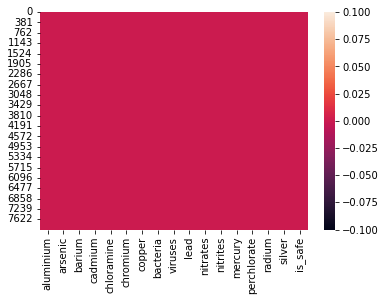

In [5]:
sns.heatmap(data.isna())
plt.show()

3) Візуалізувати дані:

побудувати графік (heatmap), що відображає кореляції
ознак між собою і з цільовою змінною (розміткою)

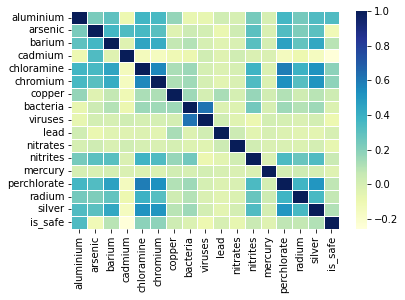

In [6]:
sns.heatmap(data = data.corr(), linewidths = .5, annot = False, cmap = "YlGnBu")
plt.show()

побудувати гістограми розподілу ознак

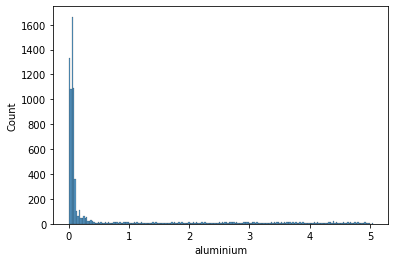

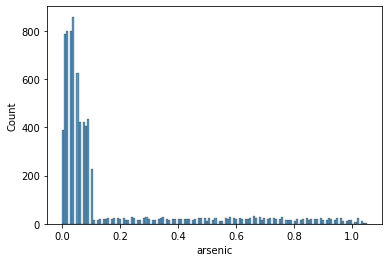

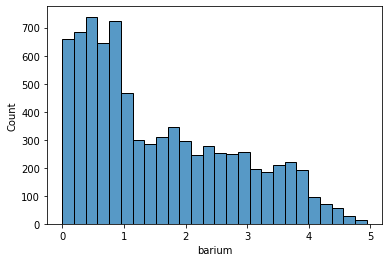

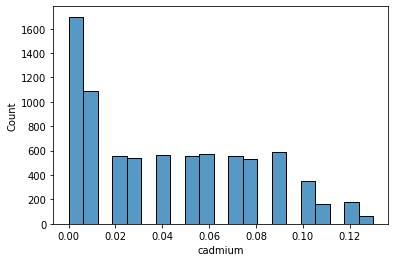

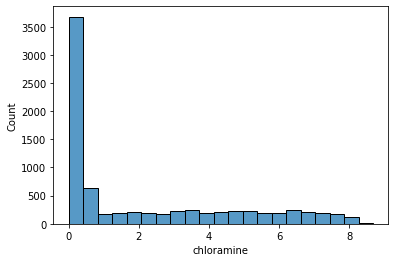

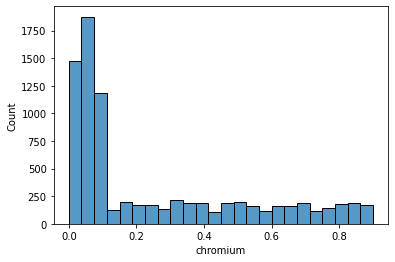

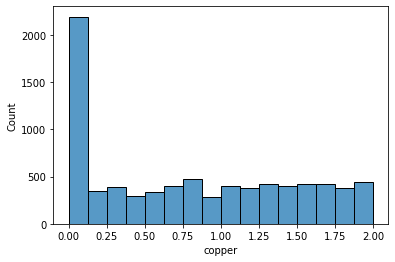

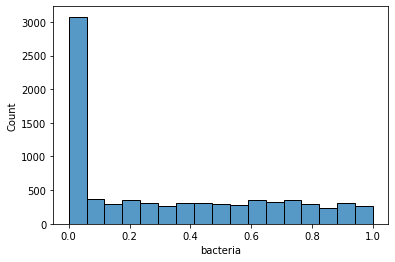

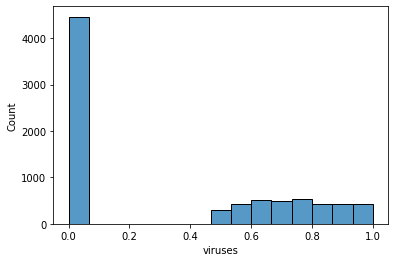

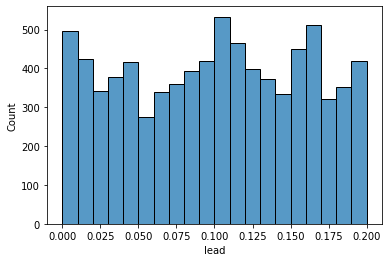

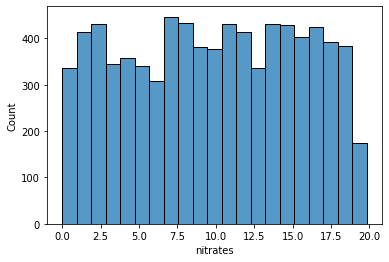

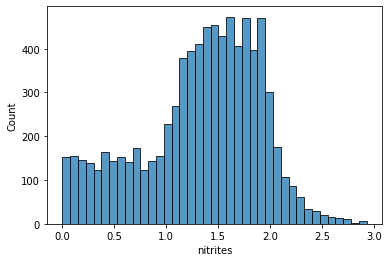

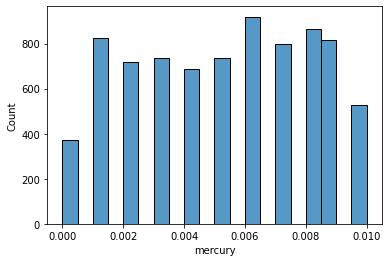

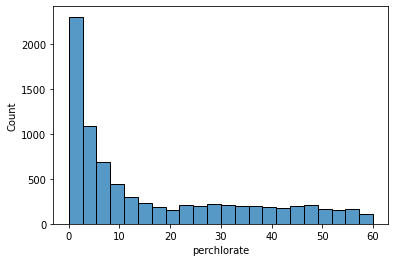

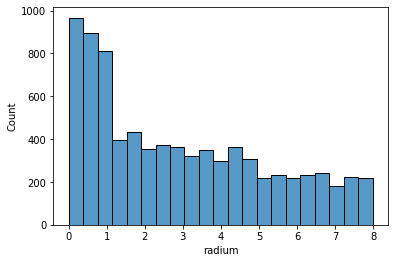

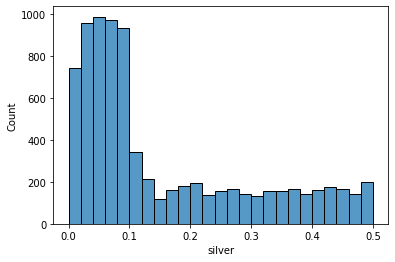

In [7]:
for title in data.columns.values.tolist()[:-1]:
    sns.histplot(data = data, x = title)
    plt.show()

і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)

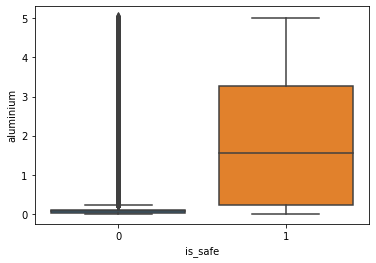

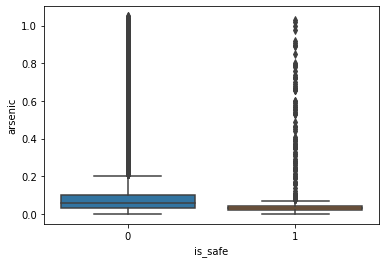

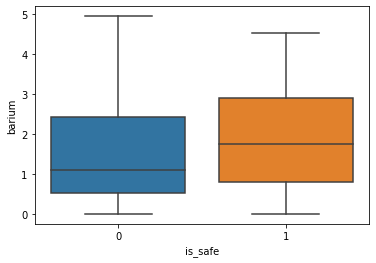

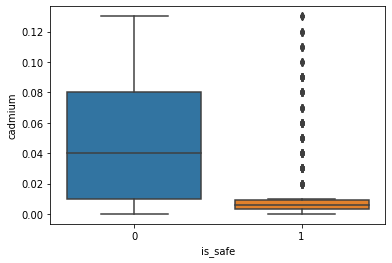

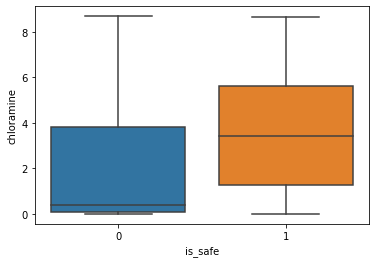

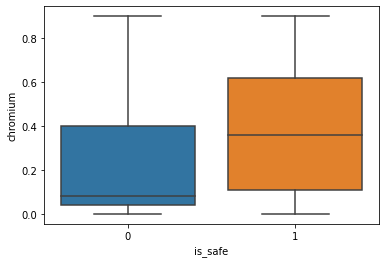

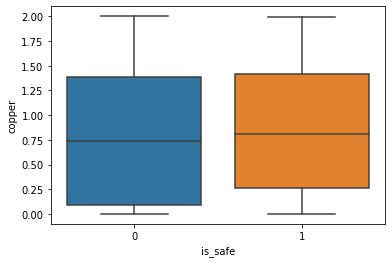

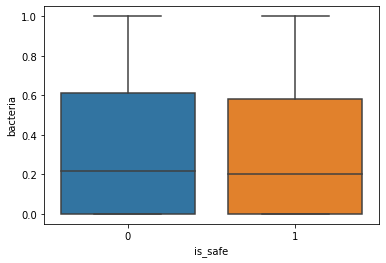

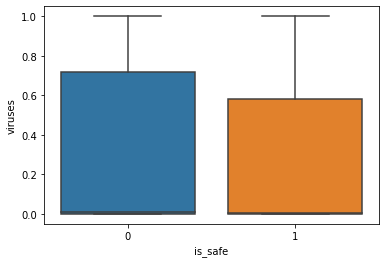

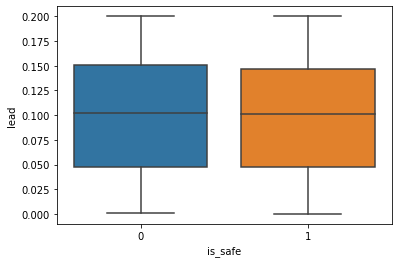

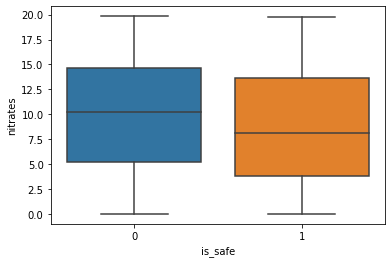

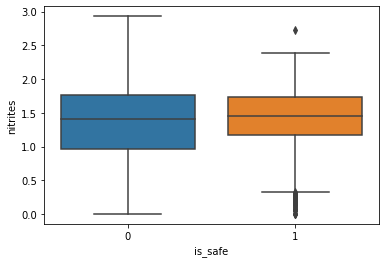

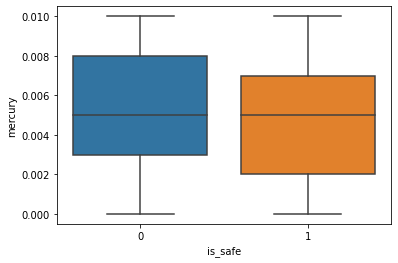

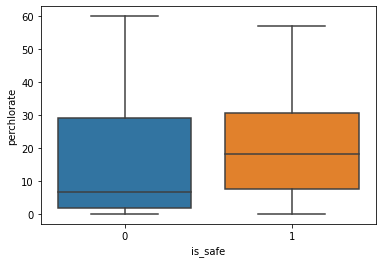

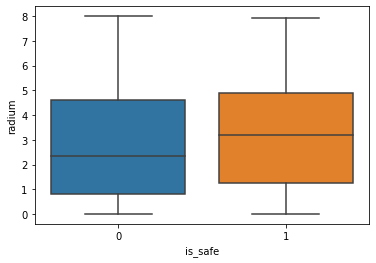

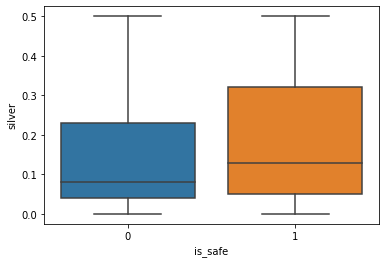

In [8]:
for title in data.columns.values.tolist()[:-1]:
    sns.boxplot(data = data, x = 'is_safe', y = title)
    plt.show()

4) нормалізувати дані

In [9]:
columns = dict(zip(list(range(data.shape[1])), data.columns.values.tolist()))
is_safe = data['is_safe']

data = pd.DataFrame(StandardScaler().fit_transform(data)).rename(columns = columns)
data['is_safe'] = is_safe
data = data.dropna()

data.head(6)

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,silver,is_safe
0,0.777403,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-0.363345,-0.869387,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.338736,1.0
1,1.306945,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,1.002460,0.849782,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,0.851134,1.0
2,0.271572,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,-0.818614,-0.861452,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,2.035310,0.0
3,0.548198,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,1.184567,1.008475,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,2.104968,1.0
4,0.200439,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.575804,-0.866742,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-0.611672,1.0
5,0.216246,-0.520460,1.078873,-1.104207,-0.536643,0.675051,0.878366,1.063162,0.902680,0.611523,-0.012496,0.977180,0.272132,0.605207,1.076306,0.293875,1.0


5) провести навчання наступних класифікаторів

In [10]:
X = data.drop('is_safe', axis = 1)
Y = data['is_safe']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 13)

kNN

In [11]:
neigh = KNeighborsClassifier(n_neighbors = 7, algorithm = 'kd_tree')
neigh.fit(X_train, Y_train)

predict = neigh.predict(X_test)

In [12]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      2336
         1.0       0.66      0.37      0.47       302

    accuracy                           0.91      2638
   macro avg       0.79      0.67      0.71      2638
weighted avg       0.89      0.91      0.89      2638



In [13]:
print(confusion_matrix(Y_test, predict))

[[2279   57]
 [ 191  111]]


Decision Tree і візуалізувати його

In [14]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, Y_train)

predict = clf.predict(X_test)

In [15]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      2336
         1.0       0.66      0.72      0.69       302

    accuracy                           0.92      2638
   macro avg       0.81      0.83      0.82      2638
weighted avg       0.93      0.92      0.93      2638



In [16]:
print(confusion_matrix(Y_test, predict))

[[2224  112]
 [  86  216]]


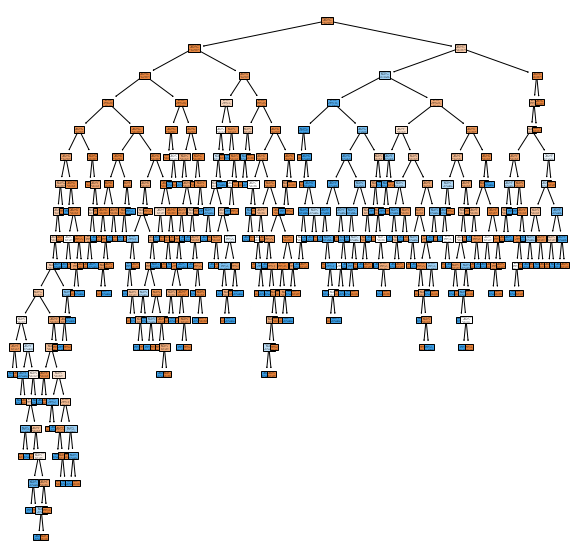

In [17]:
plt.figure(figsize = (10, 10))
plot_tree(clf, feature_names = data.columns.values.tolist(), class_names = ['Safe', 'Dangerous'], filled = True)
plt.show()

SVM

In [18]:
parameters = {'C':[1, 10], 'gamma':('scale', 'auto')}

clf = GridSearchCV(SVC(), parameters)
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
clf.best_params_

{'C': 1, 'gamma': 'scale'}

In [19]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2336
         1.0       0.82      0.48      0.61       302

    accuracy                           0.93      2638
   macro avg       0.88      0.73      0.78      2638
weighted avg       0.92      0.93      0.92      2638



In [20]:
print(confusion_matrix(Y_test, predict))

[[2305   31]
 [ 157  145]]


Random Forest

In [21]:
parameters = {'n_estimators':[10, 20, 50, 100, 150, 250], 'criterion':('gini', 'entropy'), 'max_features':('auto', 'sqrt', 'log2')}

clf = GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
clf.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

In [22]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2336
         1.0       0.83      0.61      0.70       302

    accuracy                           0.94      2638
   macro avg       0.89      0.80      0.84      2638
weighted avg       0.94      0.94      0.94      2638



In [23]:
print(confusion_matrix(Y_test, predict))

[[2298   38]
 [ 117  185]]


AdaBoost

In [24]:
parameters = {'n_estimators':[5, 10, 25, 50, 100, 150], 'learning_rate':[0.01, 0.05, 0.1, 0.5, 1], 'algorithm':('SAMME', 'SAMME.R')}
clf = GridSearchCV(AdaBoostClassifier(), parameters)
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
clf.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 150}

In [25]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2336
         1.0       0.77      0.51      0.61       302

    accuracy                           0.93      2638
   macro avg       0.85      0.74      0.78      2638
weighted avg       0.92      0.93      0.92      2638



In [26]:
print(confusion_matrix(Y_test, predict))

[[2290   46]
 [ 149  153]]
